## Logistic Regression - Predicting Heart Disease

In [1]:
import pandas as pd
import numpy as np

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/rgard/csv_files/Logistic-Regression/Heart_Disease.csv")

## Exploratory Data Analysis

In [3]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
print(df["male"].value_counts())

print(df["male"].value_counts(normalize=True)*100)

male
0    2419
1    1819
Name: count, dtype: int64
male
0    57.078811
1    42.921189
Name: proportion, dtype: float64


In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df_subset = df.fillna(df.median())

print(df_subset.isna().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [10]:
df_subset.shape

(4238, 16)

In [11]:
print(df_subset["male"].value_counts())

print(df_subset["male"].value_counts(normalize=True)*100)

male
0    2419
1    1819
Name: count, dtype: int64
male
0    57.078811
1    42.921189
Name: proportion, dtype: float64


In [12]:
df_subset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Logistic Regression Analysis

In [13]:
predictor = df_subset.drop("TenYearCHD", axis=1)
target = df_subset["TenYearCHD"]

In [14]:
logx = predictor
logy = target

In [15]:
logx = sm.add_constant(logx)

In [16]:
logit_model = sm.Logit(logy,logx)

In [17]:
result = logit_model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           15
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                  0.1115
Time:                        12:41:27   Log-Likelihood:                -1604.4
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.834e-76
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1149      0.665    -12.201      0.000      -9.418      -6.811
male                0.5030      0.100      5.011      0.000       0.306       0.700
age                 0.0621      

In [18]:
x = df_subset.drop("TenYearCHD",axis=1)
y = df_subset["TenYearCHD"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =.25, random_state = 42)

In [20]:
clf = LogisticRegression(max_iter=3000).fit(x_train, y_train)

In [21]:
clf.coef_

array([[ 0.43387573,  0.06462866,  0.03290748, -0.07597988,  0.0250522 ,
         0.2125632 ,  0.68488015,  0.16805793,  0.10229052,  0.00073772,
         0.01342768,  0.00451048, -0.01111344, -0.00640006,  0.00826369]])

In [22]:
clf.intercept_

array([-7.87698246])

In [23]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


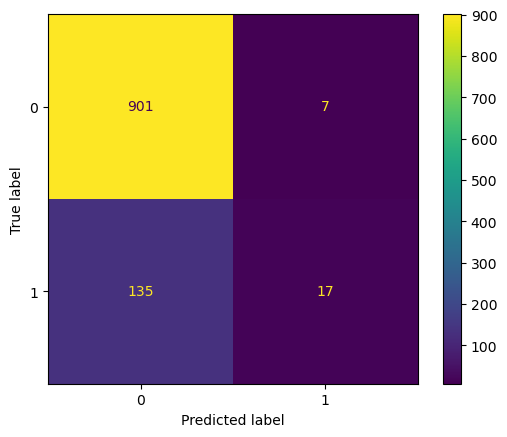

In [24]:
cm = metrics.confusion_matrix(y_test,y_pred, labels=clf.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot(values_format='')

plt.show()

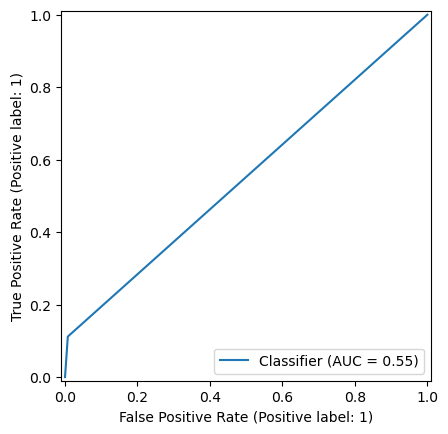

In [25]:
metrics.RocCurveDisplay.from_predictions(y_test,y_pred)

plt.show();

In [26]:
metrics.roc_auc_score(y_test,y_pred)

0.5520664270809182

In [27]:
df["TenYearCHD"].value_counts(normalize=True)

TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64

In [28]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test,y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test,y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test,y_pred))
print("F1:", "%.6f" % metrics.f1_score(y_test,y_pred))

Accuracy: 0.866038
Precision: 0.708333
Recall: 0.111842
F1: 0.193182


In [29]:
target_names = ['Will not have heart disease in 10 years', 'Will have heart disease in 10 years']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                                         precision    recall  f1-score   support

Will not have heart disease in 10 years       0.87      0.99      0.93       908
    Will have heart disease in 10 years       0.71      0.11      0.19       152

                               accuracy                           0.87      1060
                              macro avg       0.79      0.55      0.56      1060
                           weighted avg       0.85      0.87      0.82      1060



In [30]:
clf_balanced = LogisticRegression(class_weight='balanced', max_iter=3000).fit(x_train, y_train)

In [31]:
clf_balanced.coef_

array([[ 0.39435005,  0.06828456,  0.0176415 ,  0.01939326,  0.02368626,
         0.34639437,  0.59142871,  0.19066457,  0.24073186,  0.00079919,
         0.0113732 ,  0.00598836, -0.00655651, -0.00619524,  0.0065852 ]])

In [32]:
clf_balanced.intercept_

array([-6.22831115])

In [33]:
y_balanced_pred = clf_balanced.predict(x_test)
print(y_balanced_pred)

[1 0 0 ... 0 0 0]


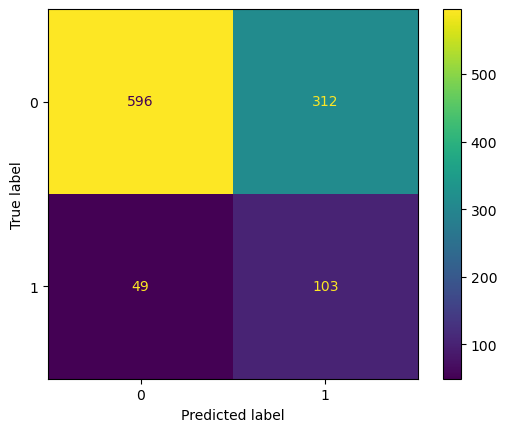

In [34]:
cm = metrics.confusion_matrix(y_test,y_balanced_pred, labels=clf_balanced.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_balanced.classes_)

disp.plot(values_format='')

plt.show()

In [35]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test,y_balanced_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test,y_balanced_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test,y_balanced_pred))
print("F1:", "%.6f" % metrics.f1_score(y_test,y_balanced_pred))

Accuracy: 0.659434
Precision: 0.248193
Recall: 0.677632
F1: 0.363316


In [36]:
target_names = ['Will not have heart disease in 10 years', 'Will have heart disease in 10 years']
print(metrics.classification_report(y_test, y_balanced_pred, target_names=target_names))

                                         precision    recall  f1-score   support

Will not have heart disease in 10 years       0.92      0.66      0.77       908
    Will have heart disease in 10 years       0.25      0.68      0.36       152

                               accuracy                           0.66      1060
                              macro avg       0.59      0.67      0.57      1060
                           weighted avg       0.83      0.66      0.71      1060



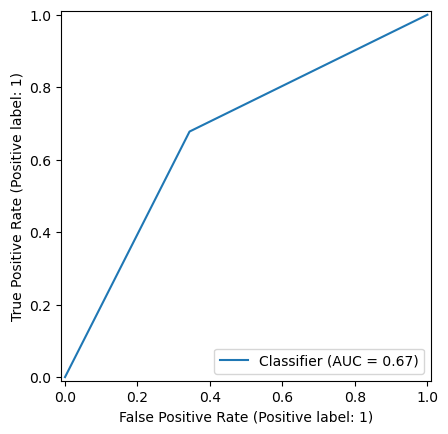

In [37]:
metrics.RocCurveDisplay.from_predictions(y_test,y_balanced_pred)

plt.show();

In [38]:
metrics.roc_auc_score(y_test,y_balanced_pred)

0.6670096220728032

## Multicollinearity Assumption

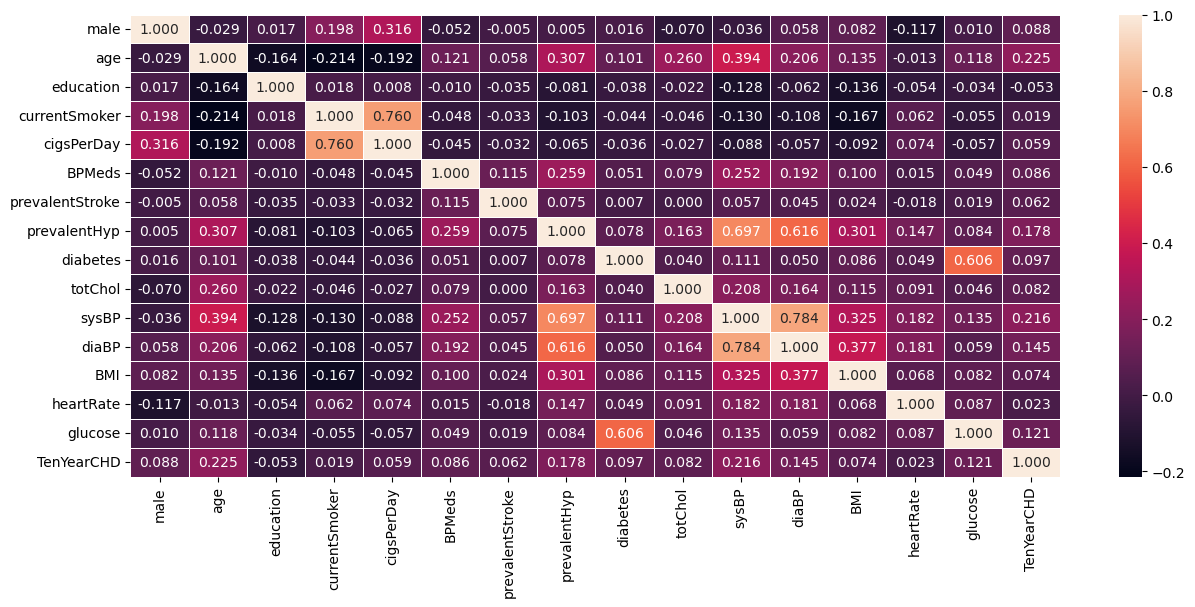

In [39]:
plt.figure(figsize=(15,6))
correlation_matrix = df_subset.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt=".3f" , linewidth = .5)
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x = df_subset[["male", "age", "education", "currentSmoker", "cigsPerDay", "BPMeds", "prevalentStroke",
              "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate",
              "glucose"]]

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

df_vif = pd.DataFrame(vif, index=x.columns, columns = ['VIF'])

df_vif

,VIF
male,2.087617
age,40.871932
education,4.747486
currentSmoker,4.736141
cigsPerDay,4.024146
BPMeds,1.131116
prevalentStroke,1.025011
prevalentHyp,2.386172
diabetes,1.569107
totChol,31.475795


In [42]:
# Dropping currentSmoker column do to having a column called cigsPerDay. Just would be redundant to keep the currentSmoker column
# Dropping sysBP, diaBP, BMI, glucose, heartRate, and education due to having high correlation with other variables.

x = df_subset[["male", "cigsPerDay", "BPMeds", "prevalentStroke",
              "prevalentHyp", "diabetes", "totChol"
              ]]

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

df_vif = pd.DataFrame(vif, index=x.columns, columns = ['VIF'])

df_vif

,VIF
male,1.898997
cigsPerDay,1.735359
BPMeds,1.120234
prevalentStroke,1.022037
prevalentHyp,1.605480
diabetes,1.036308
totChol,2.449518


In [43]:
x_2 = df_subset.drop(["TenYearCHD", "currentSmoker", "sysBP", "diaBP", "BMI","glucose","heartRate","education"],axis=1)
y_2 = df_subset["TenYearCHD"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_2 ,y_2, test_size =.25, random_state = 42)

In [45]:
clf_2 = LogisticRegression(class_weight='balanced', max_iter=3000).fit(x_train, y_train)

In [46]:
clf_2.coef_

array([[0.40921254, 0.07362326, 0.02289687, 0.4059262 , 0.56179731,
        0.59458735, 0.85392291, 0.00117871]])

In [47]:
clf_2.intercept_

array([-4.76280916])

In [48]:
y_pred_2 = clf_2.predict(x_test)
print(y_pred_2)

[1 0 0 ... 0 0 0]


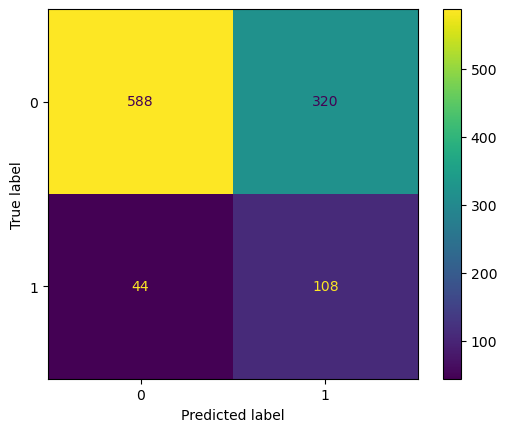

In [49]:
cm = metrics.confusion_matrix(y_test,y_pred_2, labels=clf_2.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_2.classes_)

disp.plot(values_format='')

plt.show()

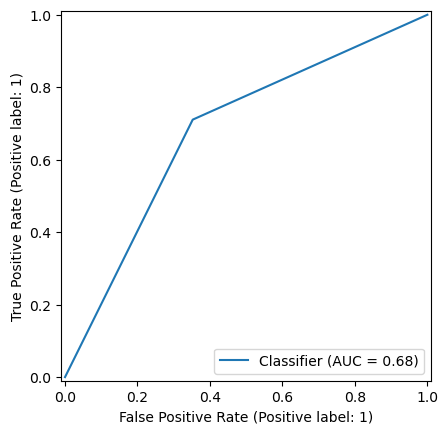

In [50]:
metrics.RocCurveDisplay.from_predictions(y_test,y_pred_2)

plt.show();

In [51]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test,y_pred_2))
print("Precision:", "%.6f" % metrics.precision_score(y_test,y_pred_2))
print("Recall:", "%.6f" % metrics.recall_score(y_test,y_pred_2))
print("F1:", "%.6f" % metrics.f1_score(y_test,y_pred_2))

Accuracy: 0.656604
Precision: 0.252336
Recall: 0.710526
F1: 0.372414


In [52]:
target_names = ['Will not have heart disease in 10 years', 'Will have heart disease in 10 years']
print(metrics.classification_report(y_test, y_pred_2, target_names=target_names))

                                         precision    recall  f1-score   support

Will not have heart disease in 10 years       0.93      0.65      0.76       908
    Will have heart disease in 10 years       0.25      0.71      0.37       152

                               accuracy                           0.66      1060
                              macro avg       0.59      0.68      0.57      1060
                           weighted avg       0.83      0.66      0.71      1060

